# Libraries

In [1]:
import sys 
import glob as g
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import numpy as np
import MDAnalysis as mda
import re
from matplotlib.ticker import AutoMinorLocator
from scipy.optimize import curve_fit

In [2]:
sys.path.append("/home/jackh/cphmd_tools/cphmd-analysis")
import cphmdanalysis as cphmd
from cphmdanalysis import compute_pkas as pka
from cphmdanalysis import HH_fitting as pka_fit

# Paths and pHs

In [3]:
phs = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5]
path = '/data/jackh/plasmepsin/holo_plasmepsin/run'
pdb = str(path)+'/1sme.pdb'
sstage = 21
lstage = 42
stages = [x for x in range(sstage, lstage+1)]

# Load Lambdas

## Seed Files

In [4]:
files = []
for n, ph in enumerate(phs):
    files.append(g.glob('{}/stage{}/*ph{}*lamb*'.format(path, sstage, ph)))

In [5]:
files

[['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph1.0_temp300.0.lamb_2'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph1.5_temp300.0.lamb_3'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph2.0_temp300.0.lamb_4'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph2.5_temp300.0.lamb_6'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph3.0_temp300.0.lamb_8'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph3.5_temp300.0.lamb_10'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph4.0_temp300.0.lamb_12'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph4.5_temp300.0.lamb_14'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph5.0_temp300.0.lamb_16'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph5.5_temp300.0.lamb_17'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_ph6.0_temp300.0.lamb_18'],
 ['/data/jackh/plasmepsin/holo_plasmepsin/run/stage21/1sme_

In [6]:
data = [cphmd.lambda_data(x[0]) for x in files]

## Add Files

This section is not needed right now. 

In [7]:
for rep, ph in enumerate(phs):
    for n in stages[1:]:
        file = g.glob('{}/stage{}/*ph{}*lamb*'.format(path, n, ph))
        data[rep].add_l_file(file_path=file[0])
        print("{} Added".format(file[0]))

/data/jackh/plasmepsin/holo_plasmepsin/run/stage22/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage23/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage24/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage25/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage26/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage27/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage28/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage29/1sme_ph1.0_temp300.0.lamb_2 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage30/1sme_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage31/1sme_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage32/1sme_ph1.0_temp300.0.lamb_0 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage33/1sme_ph1.0_tem

/data/jackh/plasmepsin/holo_plasmepsin/run/stage36/1sme_ph3.0_temp300.0.lamb_6 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage37/1sme_ph3.0_temp300.0.lamb_6 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage38/1sme_ph3.0_temp300.0.lamb_6 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage39/1sme_ph3.0_temp300.0.lamb_6 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage40/1sme_ph3.0_temp300.0.lamb_6 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage41/1sme_ph3.0_temp300.0.lamb_6 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage42/1sme_ph3.0_temp300.0.lamb_6 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage22/1sme_ph3.5_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage23/1sme_ph3.5_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage24/1sme_ph3.5_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage25/1sme_ph3.5_temp300.0.lamb_10 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage26/1sme_ph3.5

/data/jackh/plasmepsin/holo_plasmepsin/run/stage30/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage31/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage32/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage33/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage34/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage35/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage36/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage37/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage38/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage39/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage40/1sme_ph5.5_temp300.0.lamb_15 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage41/1sm

/data/jackh/plasmepsin/holo_plasmepsin/run/stage42/1sme_ph7.5_temp300.0.lamb_19 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage22/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage23/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage24/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage25/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage26/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage27/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage28/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage29/1sme_ph8.0_temp300.0.lamb_22 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage30/1sme_ph8.0_temp300.0.lamb_21 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage31/1sme_ph8.0_temp300.0.lamb_21 Added
/data/jackh/plasmepsin/holo_plasmepsin/run/stage32/1sm

## Check Data

In [8]:
print('Number of pHs: {}'.format(len(data)))
print('Number of titra site: {}'.format(data[0].n_ititr))
print('Number of lambda vals: {}'.format(len(data[0].lambda_and_x_vals[0])))

Number of pHs: 16
Number of titra site: 96
Number of lambda vals: 24750


In [9]:
import pandas as pd
pd.set_option('display.max_rows', None) # prevents truncation of the dataframe
data[0].info_table

Ititr  Ires  Itauto
0       1     4       3
1       2     4       4
2       3     7       3
3       4     7       4
4       5    10       3
5       6    10       4
6       7    19       3
7       8    19       4
8       9    21       3
9      10    21       4
10     11    24       3
11     12    24       4
12     13    34       3
13     14    34       4
14     15    56       1
15     16    56       2
16     17    59       3
17     18    59       4
18     19    67       3
19     20    67       4
20     21    69       3
21     22    69       4
22     23    74       3
23     24    74       4
24     25    89       3
25     26    89       4
26     27   104       3
27     28   104       4
28     29   107       3
29     30   107       4
30     31   112       3
31     32   112       4
32     33   121       3
33     34   121       4
34     35   130       3
35     36   130       4
36     37   137       3
37     38   137       4
38     39   142       3
39     40   142       4
40     41   150       3
41     42   150       4
42     43   161       1
43     44   161       2
44     45   162       3
45     46   162       4
46     47   164       1
47     48   164       2
48     49   174       3
49     50   174       4
50     51   175       3
51     52   175       4
52     53   179       3
53     54   179       4
54     55   185       3
55     56   185       4
56     57   189       1
57     58   189       2
58     59   190       3
59     60   190       4
60     61   198       3
61     62   198       4
62     63   200       1
63     64   200       2
64     65   207       3
65     66   207       4
66     67   214       3
67     68   214       4
68     69   225       3
69     70   225       4
70     71   235       3
71     72   235       4
72     73   258       3
73     74   258       4
74     75   262       3
75     76   262       4
76     77   269       3
77     78   269       4
78     79   271       3
79     80   271       4
80     81   276       1
81     82   276       2
82     83   278       3
83     84   278       4
84     85   279       3
85     86   279       4
86     87   293       3
87     88   293       4
88     89   303       3
89     90   303       4
90     91   314       3
91     92   314       4
92     93   316       3
93     94   316       4
94     95   318       1
95     96   318       2

# Do CpHMD Calculations and Calculate the Stepwise Titration

Get the columns of the residues of interest.

In [10]:
key_resids = [34, 214]
resids = data[0].find_residues(key_resids)     
print(resids)

[6, 33]


Calculate the running S-values.

In [11]:
for x in range(len(data)):
    data[x].compute_all_s_values()

Calculate the pKas.

In [12]:
pkas = pka(phs, data)

Check the pKas.

In [13]:
# Fold Cell
print('D34 pKa: {0:0.2f}, Hill: {1:0.2f}'.format(pkas[resids[0]][0], pkas[resids[0]][1]))
print('D214 pKa: {0:0.2f}, Hill: {1:0.2f}'.format(pkas[resids[1]][0], pkas[resids[1]][1]))

D34 pKa: 3.09, Hill: 0.43
D214 pKa: 4.79, Hill: 0.94


Count the number of protons.

In [14]:
double_s = []
for rep, ph in enumerate(phs):
    s = 2 - (data[rep].s[resids[0]] + data[rep].s[resids[1]]) # to get the number of protons instead of unprot frac.
    double_s.append(s)

In [33]:
with open('holo.dat', 'w') as o:
    o.write('# pH, Number of Proton from D34 and D214 \n')
    for n, ph in enumerate(phs):
        #print(ph, double_s[n])
        o.write(f'{ph:0.1f} {double_s[n]:0.2f} \n')
        

The fitting functions.

In [15]:
def double_HH_for_fitting_pka(ph, pka1, pka2):
    a = (-1 / (1 + 10**(1*(pka1-ph))))
    b = (-1 / (1 + 10**(1*(pka2-ph))))
    return a+b+2

In [16]:
def double_HH_for_fitting_pka_w_hill(ph, pka1, hill1, pka2, hill2):
    a = (-1 / (1 + 10**(hill1*(pka1-ph))))
    b = (-1 / (1 + 10**(hill2*(pka2-ph))))
    return a+b+2

In [17]:
def stepwise_pKa(ph, pka1, pka2):
    y = ((10**(pka2-ph)) + (2*(10**(pka1+pka2-2*ph)))) / ((1+(10**(pka2-ph)))+(10**(pka1+pka2-2*ph)))
    return y

Fit using the two titration site model.

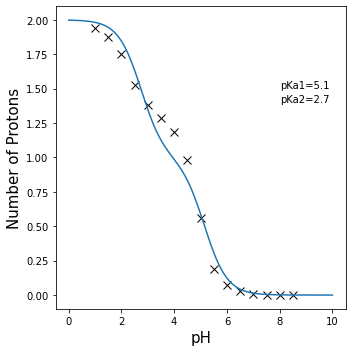

In [29]:
# Fold Cell
fig, axes = plt.subplots(figsize=(5,5))

axes.set_xlabel('pH', fontsize=15)
axes.set_ylabel('Number of Protons', fontsize=15)
# plot points 
axes.plot(phs, double_s, 'kx', markersize=7.5)

# --- Perform Curve Fit to Obtain Parameters ---
c_fit = curve_fit(double_HH_for_fitting_pka, phs, double_s, p0=[pkas[resids[1]][0], pkas[resids[0]][0]])
#c_fit = curve_fit(double_HH_for_fitting_pka_w_hill, phs, double_s, p0=[pkas[resids[1]][0], pkas[resids[1]][1], pkas[resids[0]][0], pkas[resids[0]][1]])
# Make a plot using Curve Fit parameters
fit1 = []
for x in np.linspace(0, 10, 500):
    fit1.append([x, double_HH_for_fitting_pka(x, c_fit[0][0], c_fit[0][1])])
axes.plot([x[0] for x in fit1], [y[1] for y in fit1])

#print(c_fit)    
axes.text(8, 1.5, 'pKa1={0:0.1f}'.format(c_fit[0][0]))
axes.text(8, 1.4, 'pKa2={0:0.1f}'.format(c_fit[0][1]))
    
#axes.set_xlim(2,8)
#axes.set_ylim(0, 2)

plt.tight_layout()
#plt.savefig('double_titration_curve_pka.png', dpi=360)
plt.show()

Fit using the stepwise titration model.

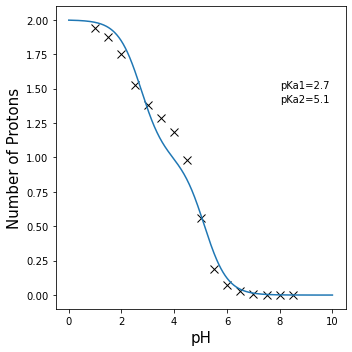

In [19]:
# Fold Cell
fig, axes = plt.subplots(figsize=(5,5))

axes.set_xlabel('pH', fontsize=15)
axes.set_ylabel('Number of Protons', fontsize=15)
# plot points 
axes.plot(phs, double_s, 'kx', markersize=7.5)

# --- Perform Curve Fit to Obtain Parameters ---
c_fit = curve_fit(stepwise_pKa, phs, double_s, 
                  p0=[pkas[resids[0]][0], pkas[resids[1]][0]])
# Make a plot using Curve Fit parameters
fit2 = []
for x in np.linspace(0, 10, 500):
    fit2.append([x, stepwise_pKa(x, c_fit[0][0], c_fit[0][1])])
axes.plot([x[0] for x in fit2], [y[1] for y in fit2])

#print(c_fit)    
axes.text(8, 1.5, 'pKa1={0:0.1f}'.format(c_fit[0][0]))
axes.text(8, 1.4, 'pKa2={0:0.1f}'.format(c_fit[0][1]))
    
#axes.set_xlim(2,8)
#axes.set_ylim(0, 2)

plt.tight_layout()
#plt.savefig('double_titration_curve_pka.png', dpi=360)
plt.show()

Save Data

In [20]:
with open('holo_double_s_D34_D214_stage_21_to_42.dat', 'w') as o1: 
    o1.write("# pH, S \n")
    for ph, ds in zip(phs, double_s):
        o1.write(f'{ph} {ds:0.2f} \n')

In [21]:
with open('holo_stepwise_fit_stage_21_to_42.dat', 'w') as o2:
    o2.write("# pH, S \n")
    for dat in fit2:
        o2.write(f'{dat[0]:0.2f} {dat[1]:0.2f} \n')

# Track the Protons

In [22]:
D34_neut_D214_neut = [] # state1, D34 = 66 and D214 = 66
D34_neut_D214_char = [] # state2
D34_char_D214_neut = [] # state3
D34_char_D214_char = [] # state4

for rep, ph in enumerate(phs):
    state1 = 0
    state2 = 0
    state3 = 0
    state4 = 0
    total = 0
    for i in range(len(data[rep].lambda_and_x_vals[0])):
        if (data[rep].lambda_and_x_vals[12][i] <= 0.2 or data[rep].lambda_and_x_vals[12][i] >= 0.8) and (data[rep].lambda_and_x_vals[13][i] <= 0.2 or data[rep].lambda_and_x_vals[13][i] >= 0.8) and (data[rep].lambda_and_x_vals[66][i] <= 0.2 or data[rep].lambda_and_x_vals[66][i] >= 0.8) and (data[rep].lambda_and_x_vals[67][i] <= 0.2 or data[rep].lambda_and_x_vals[67][i] >= 0.8):
            total += 1
        if data[rep].lambda_and_x_vals[12][i] <= 0.2 and (data[rep].lambda_and_x_vals[13][i] <= 0.2 or data[rep].lambda_and_x_vals[13][i] >= 0.8) and data[rep].lambda_and_x_vals[66][i] <= 0.2 and (data[rep].lambda_and_x_vals[67][i] <= 0.2 or data[rep].lambda_and_x_vals[67][i] >= 0.8):
            state1 += 1
        if data[rep].lambda_and_x_vals[12][i] <= 0.2 and (data[rep].lambda_and_x_vals[13][i] <= 0.2 or data[rep].lambda_and_x_vals[13][i] >= 0.8) and data[rep].lambda_and_x_vals[66][i] >= 0.8 and (data[rep].lambda_and_x_vals[67][i] <= 0.2 or data[rep].lambda_and_x_vals[67][i] >= 0.8):
            state2 += 1
        if data[rep].lambda_and_x_vals[12][i] >= 0.8 and (data[rep].lambda_and_x_vals[13][i] <= 0.2 or data[rep].lambda_and_x_vals[13][i] >= 0.8) and data[rep].lambda_and_x_vals[66][i] <= 0.2 and (data[rep].lambda_and_x_vals[67][i] <= 0.2 or data[rep].lambda_and_x_vals[67][i] >= 0.8):
            state3 += 1
        if data[rep].lambda_and_x_vals[12][i] >= 0.8 and (data[rep].lambda_and_x_vals[13][i] <= 0.2 or data[rep].lambda_and_x_vals[13][i] >= 0.8) and data[rep].lambda_and_x_vals[66][i] >= 0.8 and (data[rep].lambda_and_x_vals[67][i] <= 0.2 or data[rep].lambda_and_x_vals[67][i] >= 0.8):
            state4 += 1
    D34_neut_D214_neut.append(state1/total)
    D34_neut_D214_char.append(state2/total)
    D34_char_D214_neut.append(state3/total)
    D34_char_D214_char.append(state4/total)

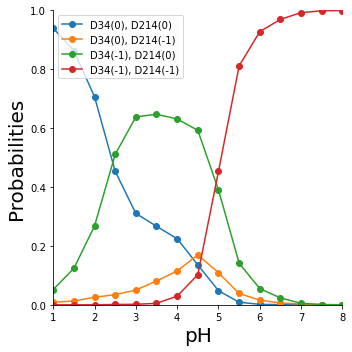

In [23]:
#Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (5,5))
fig.set_facecolor('white')

# plot points
axes.plot(phs, D34_neut_D214_neut, 'o-')
axes.plot(phs, D34_neut_D214_char, 'o-')
axes.plot(phs, D34_char_D214_neut, 'o-')
axes.plot(phs, D34_char_D214_char, 'o-')

# plot labels
legend = ['D34(0), D214(0)', 'D34(0), D214(-1)', 'D34(-1), D214(0)', 'D34(-1), D214(-1)']
axes.legend(legend)
axes.set_xlabel('pH', fontsize=20)
axes.set_ylabel('Probabilities', fontsize=20)

# plot details
axes.set_ylim(0, 1)
axes.set_xlim(1, 8)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

fig.tight_layout()
#plt.savefig("prob_of_D34-D214_prot_state_combinations.pdf")
plt.show()

Save Data

In [24]:
#with open('holo_D34_D214_prot_state_combos_stage_21_to_42.dat', 'w') as o3:
#    o3.write('# pH D34(0)-D214(0), D34(0)-D214(-1), D34(-1)-D214(0), D34(-1)-D214(-1) \n')
#    for ph, p1, p2, p3, p4 in zip(phs, D34_neut_D214_neut, D34_neut_D214_char, D34_char_D214_neut, D34_char_D214_char):
#        o3.write(f'{ph} {p1:0.2f} {p2:0.2f} {p3:0.2f} {p4:0.2f} \n')